

---



---



#Gradient Descent



---



---



Gradient descent is an optimization algorithm used to minimize a cost function by iteratively adjusting the parameters of a model in the direction of the steepest descent of the cost. It involves computing the gradient of the cost function with respect to the parameters and updating the parameters iteratively until convergence to a minimum is achieved.


In this notebook, we will implement linear regression and compare the performance of three different types of gradient descent algorithms: batch gradient descent, stochastic gradient descent, and mini-batch gradient descent.

Generally, The Gradient Descent Equation is

$$θ := θ - α * ∇J(θ)$$

#Setup

In [1]:
# Common imports
import numpy as np
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Establish a fixed random seed for consistent reproducibility in random processes
np.random.seed(42)


##Generating the dataset

In [2]:
import numpy as np

# Generating a synthetic dataset for regression analysis

# Step 1: Generating feature matrix X
# X contains 100 samples with 1 feature each
# Values are randomly sampled from a uniform distribution between 0 and 2
X = 2 * np.random.rand(100, 1)

# Step 2: Generating target variable y
# y is generated based on the equation y = 4 + 3*X + noise
# np.random.randn(100, 1) adds random noise sampled from a standard normal distribution (mean 0, std deviation 1)
# The noise introduces variability and makes the relationship between X and y more realistic
y = 4 + 3 * X + np.random.randn(100, 1)


In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # Adding x0 = 1 to each instance to include the bias term
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # Calculating the optimal theta values using the normal equation


In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
# New input data for prediction
X_new = np.array([[0], [2]])

# Augmenting the new input data by adding a column of ones to represent x0 = 1 for each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Predicting the target variable y for the new input data using the linear regression model
y_predict = X_new_b.dot(theta_best)

# Displaying the predicted values of y for the new input data
y_predict


array([[4.21509616],
       [9.75532293]])

##Setup LinearRegression model

In [8]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression model from scikit-learn
lin_reg = LinearRegression()  # Instantiate a LinearRegression model
lin_reg.fit(X, y)  # Train the LinearRegression model on X and y
lin_reg.intercept_  # Intercept (bias) term of the linear regression model
lin_reg.coef_       # Coefficients of the features in the linear regression model


array([[2.77011339]])

In [10]:
# Assuming lin_reg is a trained LinearRegression model
y_predict = lin_reg.predict(X_new)
y_predict

array([[4.21509616],
       [9.75532293]])



---



---



##Type1: Batch Gradient Descent




---


---
This method computes the gradient of the cost function with respect to the parameters for the entire training dataset. It involves updating the parameters in the direction opposite to the gradient of the cost function with a fixed learning rate.


In [11]:
# Learning rate
eta = 0.1

# Number of iterations
n_iterations = 1000

# Number of samples
m = 100

# Random initialization of parameters
theta = np.random.randn(2,1)

# Gradient Descent loop
for iteration in range(n_iterations):
    # Compute gradients
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

    # Update parameters
    theta = theta - eta * gradients


In [12]:
# Parameters after running Gradient Descent
theta


array([[4.21509616],
       [2.77011339]])

In [13]:
# Calculate predictions using the trained linear regression model and new data
predictions = X_new_b.dot(theta)




- **Visualization**:
  - The function plots the original data points (`X`, `y`) as cyan dots on the plot.
  - It iterates through a predefined number of iterations (`n_iterations`) to perform gradient descent.
  - During the first few iterations (`iteration < 10`), it plots the predictions made by the current parameter values as dashed lines.
  - The solid line represents the final prediction line after all iterations.

- **Gradient Descent**:
  - At each iteration, gradients are computed using the formula: `gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)`.
  - The parameter vector `theta` is updated using the computed gradients and the learning rate: `theta = theta - eta * gradients`.

- **Customization**:
  - The function allows customization of the X-axis label, axis limits, and title to reflect the learning rate (`eta`).

By visualizing the gradient descent process, this function helps in understanding how the model parameters are updated iteratively to minimize the cost function and improve the fit of the linear regression model.


In [14]:
"""
The func `plot_gradient_descent` is used to visualize the process of gradient descent for linear regression,
where;
  - `theta`: The parameter vector representing the coefficients of the linear regression model.
  - `eta`: The learning rate, controlling the step size in each iteration of gradient descent.
  - `theta_path`: (Optional) A list to store the values of theta during the gradient descent process.
"""
# List to store the values of theta during gradient descent
theta_path_bgd = []

# Function to plot the gradient descent process
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)  # Number of samples
    plt.plot(X, y, "c.")  # Plot the data points
    n_iterations = 1000  # Number of iterations for gradient descent
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)  # Calculate predictions for visualization
            style = "p-" if iteration > 0 else "m--"  # Style for plotting
            plt.plot(X_new, y_predict, style)  # Plot the predictions
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Compute gradients
        theta = theta - eta * gradients  # Update theta using gradients and learning rate
        if theta_path is not None:
            theta_path.append(theta)  # Store the values of theta during gradient descent
    plt.xlabel("$x_1$", fontsize=18)  # X-axis label
    plt.axis([0, 2, 0, 15])  # Axis limits
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)  # Title with learning rate


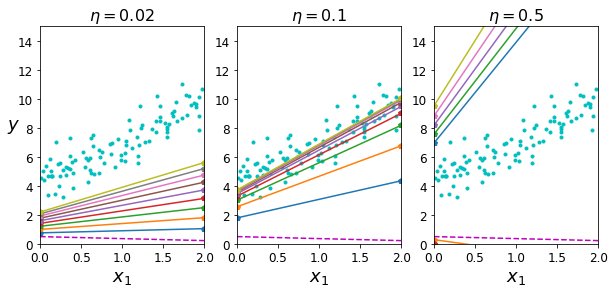

In [15]:
# Set the random seed for reproducibility
np.random.seed(42)

# Random initialization of theta
theta = np.random.randn(2,1)

# Create a figure with subplots to visualize gradient descent with different learning rates
plt.figure(figsize=(10,4))

# First subplot: learning rate eta=0.02
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# Second subplot: learning rate eta=0.1
plt.subplot(132)
plot_gradient_descent(theta,eta=0.1, theta_path=theta_path_bgd)


# Third subplot: learning rate eta=0.5
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)

# Display the figure
plt.show()


- **Based on the above Visualization**:
  -  The function plots the original data points (`X`, `y`) as cyan dots on the plot.
  - It iterates through a predefined number of iterations (`n_iterations`) to perform gradient descent.
  - During the first few iterations (`iteration < 10`), it plots the predictions made by the current parameter values as dashed lines.
  - The solid line represents the final prediction line after all iterations.



---



---


##Type2 : Stochastic Gradient Descent

---



---

SGD updates the parameters using the gradient of the cost function with respect to the parameters for each training instance individually. It involves updating the parameters in the direction opposite to the gradient of the cost function for each training instance with a fixed learning rate.

In [16]:
# List to store the values of theta during stochastic gradient descent
theta_path_sgd = []

# Number of samples
m = len(X_b)

# Set the random seed for reproducibility
np.random.seed(42)


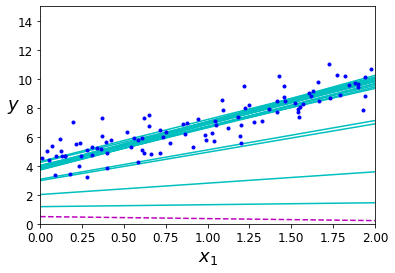

In [17]:
# Number of epochs
n_epochs = 50

# Learning schedule hyperparameters
t0, t1 = 5, 50

# Learning schedule function
def learning_schedule(t):
    return t0 / (t + t1)

# Random initialization of parameters
theta = np.random.randn(2,1)

# Stochastic Gradient Descent loop
for epoch in range(n_epochs):
    for i in range(m):
        # Plot initial predictions for the first epoch
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "c-" if i > 0 else "m--"
            plt.plot(X_new, y_predict, style)
        # Randomly select an instance
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        # Compute gradients
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # Adjust learning rate using learning schedule
        eta = learning_schedule(epoch * m + i)
        # Update parameters
        theta = theta - eta * gradients
        # Append theta to the path
        theta_path_sgd.append(theta)

# Plot the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()


  - The initial predictions for the first epoch is represented by the purple -- line, showing the model's progression.
  - Original data points (`X`, `y`) are plotted as blue dots, with the x-axis representing the feature (`x_1`) and the y-axis representing the target variable (`y`).
  - The plot provides insights into how the algorithm learns and adapts its parameters over time to fit the data.

In [18]:
# Parameters after running Gradient Descent
theta

array([[4.21076011],
       [2.74856079]])

In [19]:
from sklearn.linear_model import SGDRegressor

# Instantiate the SGDRegressor model with specified parameters
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

# Train the model on the input data X and target values y.ravel()
sgd_reg.fit(X, y.ravel())


SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [20]:
# Retrieve the intercept and coefficients of the trained SGDRegressor model
sgd_reg.intercept_ , sgd_reg.coef_


(array([4.24365286]), array([2.8250878]))



---



---


##Type3 : Mini-batch gradient descent




---


---
This method is a compromise between BGD and SGD. It computes the gradient of the cost function with respect to the parameters for a small random subset of the training dataset. It involves updating the parameters in the direction opposite to the gradient of the cost function for each mini-batch with a fixed learning rate.


In [21]:
# List to store the values of theta during Mini-batch Gradient Descent
theta_path_mgd = []

# Number of iterations
n_iterations = 50

# Size of mini-batches
minibatch_size = 20

# Set the random seed for reproducibility
np.random.seed(42)

# Random initialization of parameters
theta = np.random.randn(2,1)

# Learning schedule hyperparameters
t0, t1 = 200, 1000

# Learning schedule function
def learning_schedule(t):
    return t0 / (t + t1)

# Initialize t for learning schedule
t = 0

# Mini-batch Gradient Descent loop
for epoch in range(n_iterations):
    # Shuffle the indices
    shuffled_indices = np.random.permutation(m)
    # Shuffle the training data
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    # Iterate over mini-batches
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        # Compute gradients
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        # Adjust learning rate using learning schedule
        eta = learning_schedule(t)
        # Update parameters
        theta = theta - eta * gradients
        # Append theta to the path
        theta_path_mgd.append(theta)


In [22]:
# Parameters after running Gradient Descent
theta

array([[4.25214635],
       [2.7896408 ]])

##Conversion of Theta Values to Numpy Arrays

In [23]:
# Convert lists of theta values to numpy arrays
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)


##Comparing Paths of Theta Values for Different Gradient Descent Algorithms

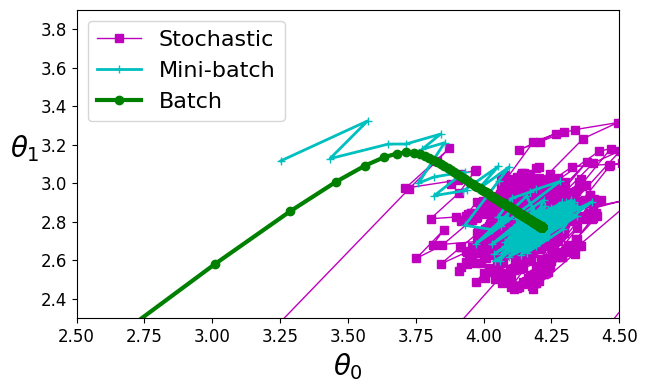

In [ ]:
plt.figure(figsize=(7,4))

# Plot the paths of theta values for different gradient descent algorithms
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "m-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "c-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "g-o", linewidth=3, label="Batch")

# Add legend and axis labels
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)

# Set axis limits
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()


#### Conclusion

The provided plot illustrates the paths of theta values for different gradient descent algorithms:

- **Stochastic Gradient Descent (SGD)**:
  - Marked with magenta squares, represents the path of theta values for stochastic gradient descent.
  
- **Mini-batch Gradient Descent**:
  - Depicted by cyan crosses with a thicker line, indicates the path of theta values for mini-batch gradient descent.
  
- **Batch Gradient Descent (BGD)**:
  - Shown with green circles and a thicker line, displays the path of theta values for batch gradient descent.

The plot visualizes how each algorithm updates the parameter values (theta) during optimization, providing insights into their convergence behaviors and efficiency. 

#### The choice of gradient descent algorithm depends on the specific requirements of the optimization task.

- SGD is preferred for large datasets and real-time learning scenarios where computational efficiency is crucial.
- BGD may be preferred when stability and precise convergence are the target, but it will cost of longer training times.
- Mini-batch GD offers a compromise between SGD and BGD, suitable for a wide range of optimization tasks.
